In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.signal import butter, sosfiltfilt, find_peaks
from utils import *
import os

%matplotlib inline
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14
np.set_printoptions(threshold=sys.maxsize,
                    suppress=True)

import torch

torch.manual_seed(1)

___
**PREPROCESSING**
___

In [2]:
filenames = os.listdir('../dataset/ble_test/')
labels = [filename.split('.')[0] for filename in filenames]

filenames

['deep_breath.csv',
 'dry_cough.csv',
 'jumping_jack.csv',
 'random.csv',
 'swallowing.csv',
 'push_up.csv',
 'throat_clearing.csv']

DEEP BREATH

(21, 2000, 7)


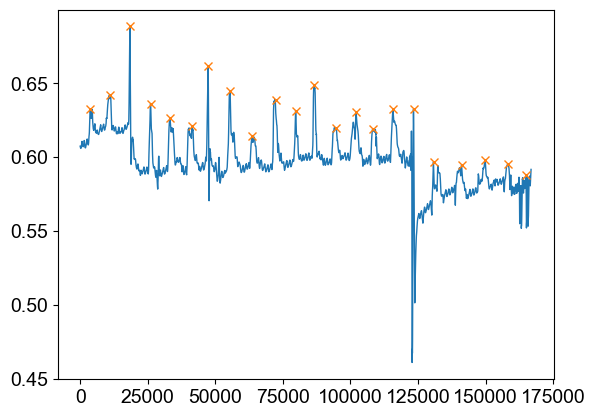

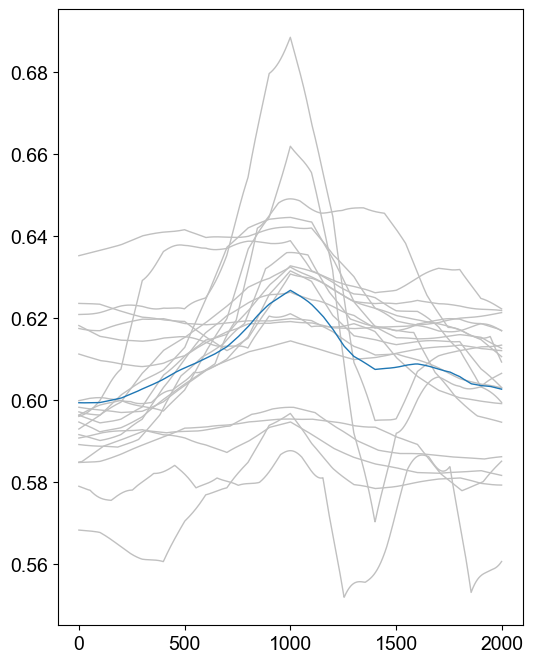

In [13]:
# deep breath
# Load
filename = filenames[0]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(data[:, 0], distance=5000)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(0, 20000)

# Construct slices_0
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_0 = []
for idx in range(expanded_peaks.shape[0]):
    slices_0.append(data[expanded_peaks[idx, :]])
slices_0 = np.array(slices_0)
mask = section_average(slices_0[:, :, 0])
slices_0 = slices_0[mask.astype(bool), :, :]
print(slices_0.shape)
slices_0 = torch.tensor(np.transpose(slices_0, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_0.shape[0]):
    plt.plot(slices_0[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_0[:, 0, :], axis=0))

In [7]:
mask.astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [10]:
slices_0.shape

torch.Size([22, 7, 2000])

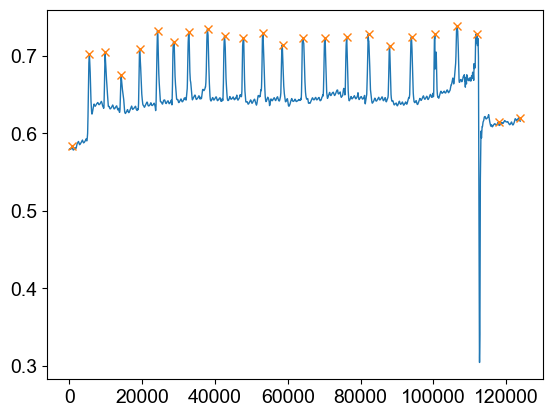

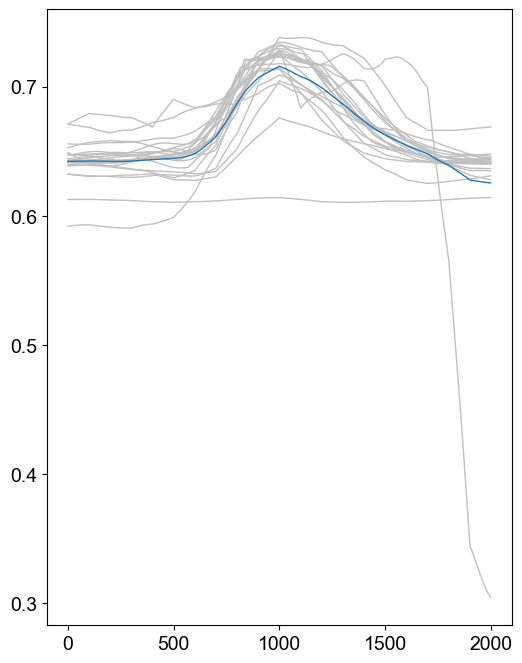

In [22]:
# dry cough
# Load
filename = filenames[1]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(data[:, 0], distance=4000)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(0, 20000)

# Construct slices
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_1 = []
for idx in range(expanded_peaks.shape[0]):
    slices_1.append(data[expanded_peaks[idx, :]])
slices_1 = np.array(slices_1)
slices_1 = torch.tensor(np.transpose(slices_1, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_1.shape[0]):
    plt.plot(slices_1[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_1[:, 0, :], axis=0))

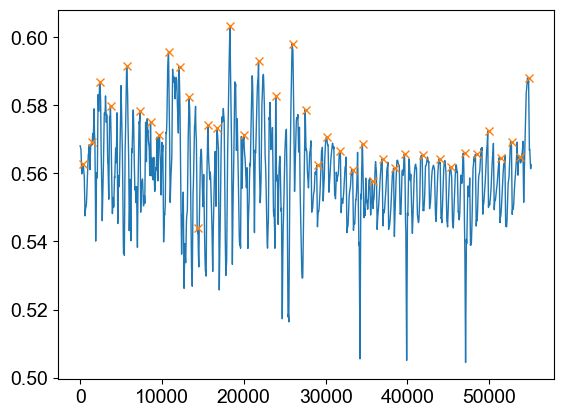

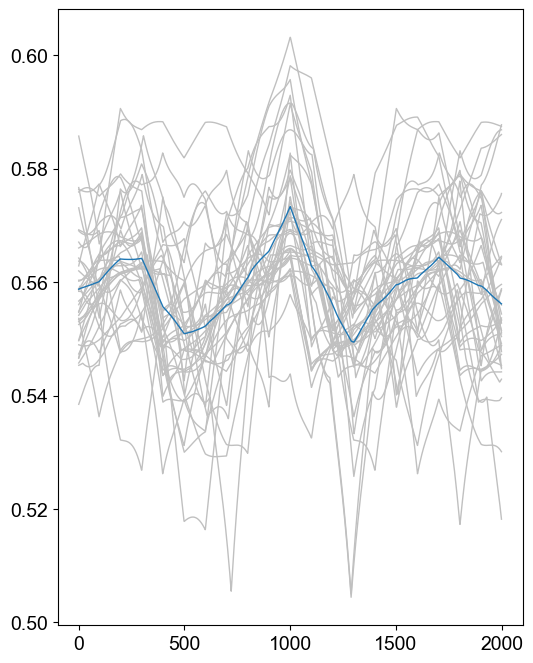

In [30]:
# jumping_jack
# Load
filename = filenames[2]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(data[:, 0], distance=1000)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(0, 20000)

# Construct slices_0
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_2 = []
for idx in range(expanded_peaks.shape[0]):
    slices_2.append(data[expanded_peaks[idx, :]])
slices_2 = np.array(slices_2)
slices_2 = torch.tensor(np.transpose(slices_2, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_2.shape[0]):
    plt.plot(slices_2[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_2[:, 0, :], axis=0))

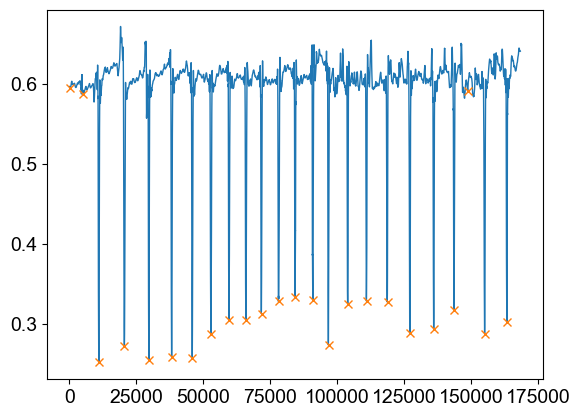

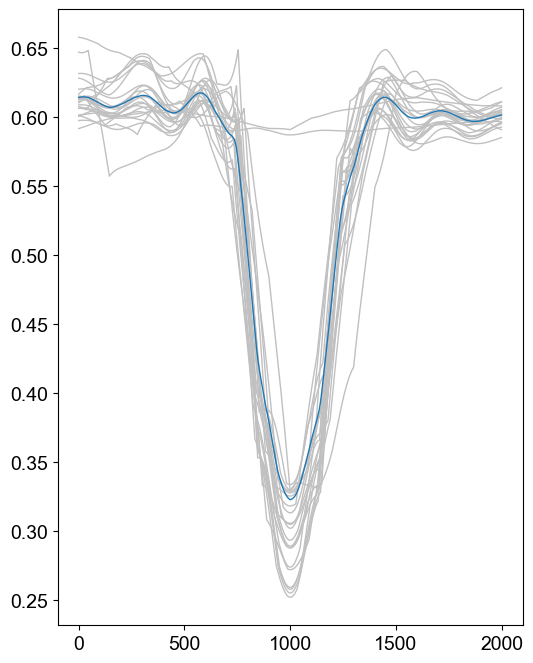

In [59]:
# swallowing
# Load
filename = filenames[4]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(-data[:, 0], distance=5000)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(20000, 100000)

# Construct slices_4
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_4 = []
for idx in range(expanded_peaks.shape[0]):
    slices_4.append(data[expanded_peaks[idx, :]])
slices_4 = np.array(slices_4)
slices_4 = torch.tensor(np.transpose(slices_4, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_4.shape[0]):
    plt.plot(slices_4[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_4[:, 0, :], axis=0))

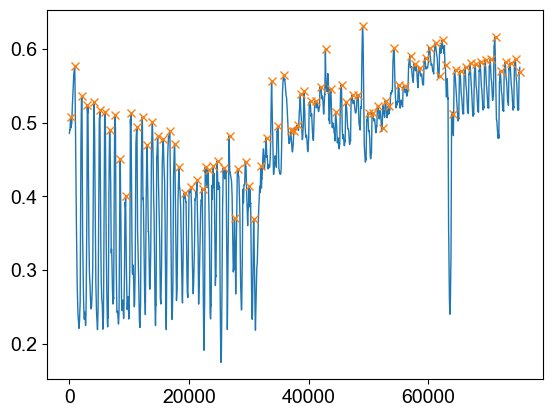

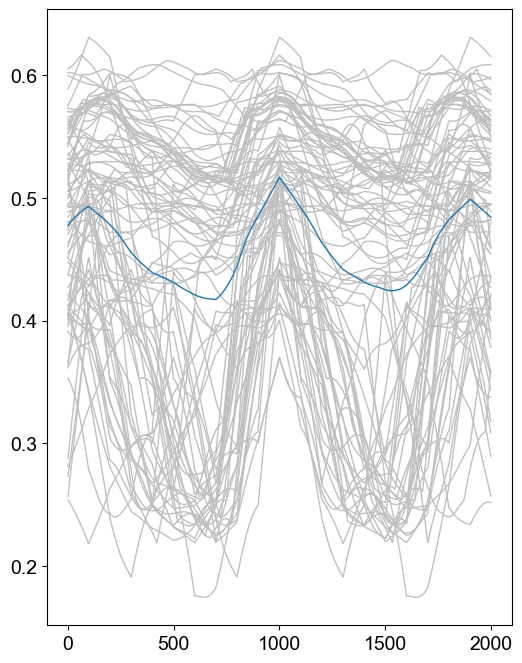

In [60]:
# push up
# Load
filename = filenames[5]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(data[:, 0], distance=500)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(20000, 40000)

# Construct slices_5
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_5 = []
for idx in range(expanded_peaks.shape[0]):
    slices_5.append(data[expanded_peaks[idx, :]])
slices_5 = np.array(slices_5)
slices_5 = torch.tensor(np.transpose(slices_5, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_5.shape[0]):
    plt.plot(slices_5[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_5[:, 0, :], axis=0))

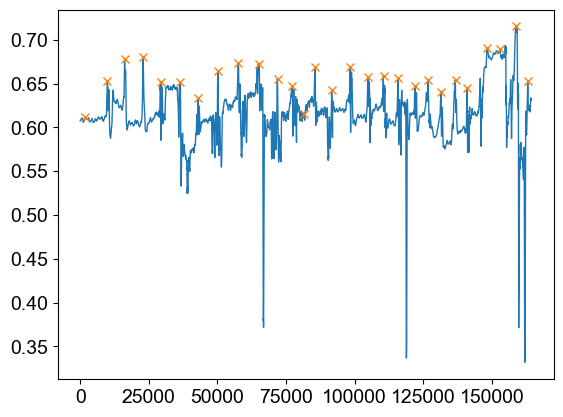

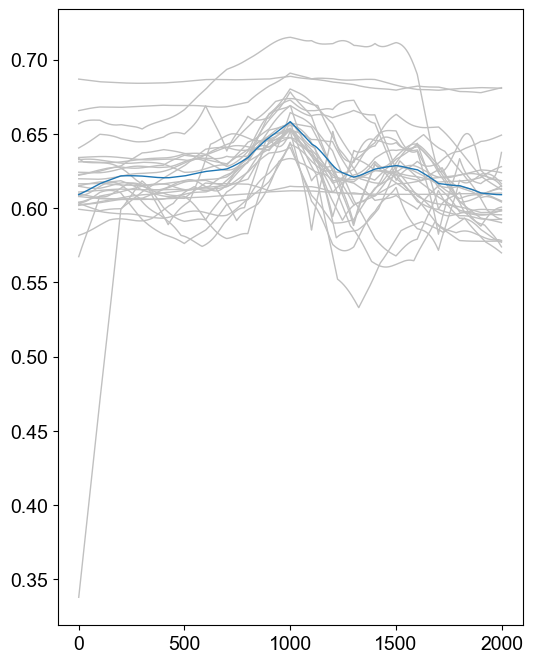

In [45]:
# throat clearing
# Load
filename = filenames[6]
data_raw = pd.read_csv(os.path.join('..', 'dataset', 'ble_test', filename), delimiter=',', header=None)
timestamps, c, b, tl, tr, r, p, y = (data_raw[i].to_numpy() for i in range(data_raw.shape[1]))
timestamps -= timestamps[0]

# Preprocess
y = detrend(y, method='butter', fc=2)
r, p, y = despike(r, 10, 0.2), despike(p, 10, 0.2), despike(y, 10, 0.2)

# Upsample
data_combined = np.column_stack([c, b, tl, tr, r, p, y])
data = np.zeros((int(np.around((len(timestamps) + 1) * 100 + 1)), 7))
for i in range(data_combined.shape[1]):
    _, data[:, i] = upsample(timestamps, data_combined[:, i], ratio=100)
timestamps, _ = upsample(timestamps, timestamps, ratio=100) # Update timestamps with the upsampled version

# Butterworth
sos = butter(1, [3, 4], 'bandstop', output='sos', fs=1000)
data[:, :4] = sosfiltfilt(sos, data[:, :4], axis=0)

# Find peaks
peaks, _ = find_peaks(data[:, 0], distance=4000)

plt.plot(timestamps, data[:, 0])
plt.plot(peaks, data[peaks, 0], 'x')
# plt.xlim(20000, 40000)

# Construct slices_6
window_width = 2000
expanded_peaks = peak_expand(peaks, window_width, len(timestamps))

slices_6 = []
for idx in range(expanded_peaks.shape[0]):
    slices_6.append(data[expanded_peaks[idx, :]])
slices_6 = np.array(slices_6)
slices_6 = torch.tensor(np.transpose(slices_6, (0, 2, 1)))

plt.figure(figsize=(6, 8))
for idx in range(slices_6.shape[0]):
    plt.plot(slices_6[idx, 0, :], 'silver')
plt.plot(torch.mean(slices_6[:, 0, :], axis=0))

In [3]:
class PharyngealDataset(torch.utils.data.Dataset):
    
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return self.features.shape[0]
    
    def __getitem__(self, idx):
        return self.features[idx,...], self.labels[idx], idx

In [20]:
my_dataset = PharyngealDataset(slices, labels)
torch.save(my_dataset, 'test.pt')

In [19]:
my_dataset = torch.load('test.pt')
my_dataset.features

tensor([[[ 6.1125e-01,  6.1123e-01,  6.1122e-01,  ...,  6.2232e-01,
           6.2229e-01,  6.2226e-01],
         [ 3.8880e-01,  3.8880e-01,  3.8880e-01,  ...,  3.9034e-01,
           3.9033e-01,  3.9032e-01],
         [ 4.2590e-01,  4.2589e-01,  4.2589e-01,  ...,  4.5672e-01,
           4.5687e-01,  4.5702e-01],
         ...,
         [-3.0899e-02, -3.2480e-02, -3.4062e-02,  ..., -1.8397e-01,
          -1.8587e-01, -1.8777e-01],
         [-4.9426e+01, -4.9426e+01, -4.9426e+01,  ..., -4.9310e+01,
          -4.9310e+01, -4.9311e+01],
         [ 3.4923e-02,  3.7727e-02,  4.0531e-02,  ...,  1.6978e-01,
           1.7063e-01,  1.7148e-01]],

        [[ 6.3521e-01,  6.3522e-01,  6.3523e-01,  ...,  6.2133e-01,
           6.2134e-01,  6.2135e-01],
         [ 3.9061e-01,  3.9062e-01,  3.9062e-01,  ...,  3.9110e-01,
           3.9109e-01,  3.9109e-01],
         [ 4.2198e-01,  4.2198e-01,  4.2197e-01,  ...,  4.2650e-01,
           4.2649e-01,  4.2648e-01],
         ...,
         [-9.4032e-03, -9

In [ ]:
import torch
import torch.nn as nn

class DualLSTMModel(nn.Module):
    def __init__(self, input_dim1, input_dim2, hidden_dim, layer_dim, output_dim):
        super(DualLSTMModel, self).__init__()

        # First LSTM layer for the first data type (e.g., photovoltage)
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim, layer_dim, batch_first=True)

        # Second LSTM layer for the second data type (e.g., Euler angles)
        self.lstm2 = nn.LSTM(input_dim2, hidden_dim, layer_dim, batch_first=True)

        # Fully connected layer for classification
        # The input dimension is doubled since we concatenate the outputs
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        # LogSoftmax for the output layer
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x1, x2):
        # Initialize hidden state for both LSTMs
        h01 = torch.zeros(layer_dim, x1.size(0), hidden_dim).requires_grad_().to(device)
        c01 = torch.zeros(layer_dim, x1.size(0), hidden_dim).requires_grad_().to(device)

        h02 = torch.zeros(layer_dim, x2.size(0), hidden_dim).requires_grad_().to(device)
        c02 = torch.zeros(layer_dim, x2.size(0), hidden_dim).requires_grad_().to(device)

        # Forward pass through first LSTM
        out1, _ = self.lstm1(x1, (h01.detach(), c01.detach()))

        # Forward pass through second LSTM
        out2, _ = self.lstm2(x2, (h02.detach(), c02.detach()))

        # Concatenate the outputs from both LSTMs
        out = torch.cat((out1[:, -1, :], out2[:, -1, :]), 1)

        # Pass the concatenated outputs through the fully connected layer
        out = self.fc(out)
        out = self.softmax(out)
        return out

# Model instantiation
input_dim1 = 4 # For photovoltage data
input_dim2 = 3 # For Euler angle data
hidden_dim = 100
layer_dim = 1
output_dim = 6 # Number of classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = DualLSTMModel(input_dim1, input_dim2, hidden_dim, layer_dim, output_dim).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.008)